<a href="https://colab.research.google.com/github/smiledinisa/pytorch_learning/blob/master/tensorboard_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizing Models, Data, and Training with TensorBoard


we’ll learn how to:

- Read in data and with appropriate transforms (nearly identical to the prior tutorial).

- Set up TensorBoard.

- Write to TensorBoard.

- Inspect a model architecture using TensorBoard.

- Use TensorBoard to create interactive versions of the visualizations we created in last tutorial, with less code


## Specifically, on point #5, we’ll see:

- A couple of ways to inspect our training data
- How to track our model’s performance as it trains
- How to assess our model’s performance once it is trained.

In [58]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#tansforms 
transforms = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,),(0.5,))
])

#datasets
trainset = torchvision.datasets.FashionMNIST('/content/sample_data', download=True, train=True, transform= transforms)
testset = torchvision.datasets.FashionMNIST('/content/sample_data', download=True, train=False, transform= transforms)

#dataloader

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle= True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle= False, num_workers=2)

#constant for classes.
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# helper function to show images.
def matplotlib_imshow(img, one_channel=False):
  if one_channel:
    img = img.mean(dim = 0)
  img = img/2 + 0.5
  npimg = img.numpy()
  if one_channel:
    plt.imshow(npimg, cmap='Greys')
  else:
    plt.imshow(np.transpose(npimg, (1,2,0)))



In [59]:
# model.
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(1,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*4*4, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*4*4)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


In [60]:
net = Net()

In [61]:
# optimizer and criterion 

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [62]:
# Tensorboard setup.
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('/content/sample_data/fashion_mnist_experiment_1')

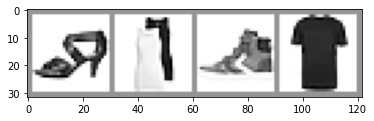

In [63]:
# Writing to TensorBoard
# get some random trainning images.
dataiter = iter(trainloader)
images, labels = dataiter.next()

#create grid of images
img_grid = torchvision.utils.make_grid(images)

#show images
matplotlib_imshow(img_grid, one_channel=True)

#write to tensorboard
writer.add_image('foru_fashion_mnist_images', img_grid)


In [20]:
import os
os.chdir('/content/sample_data')

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


--2020-08-12 02:20:57--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.84.116.182, 52.54.124.219, 34.225.3.211, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.84.116.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  37.6MB/s    in 0.3s    

2020-08-12 02:20:58 (37.6 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [71]:
LOG_DIR = '/content/sample_data/fashion_mnist_experiment_1'
get_ipython().system_raw('tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'.format(LOG_DIR))
#开启ngrok service，绑定port 6006(tensorboard)
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"
!tensorboard --logdir=/content/sample_data/fashion_mnist_experiment_1

https://048bf84bdca1.ngrok.io
2020-08-12 06:37:35.680670: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
W0812 06:37:37.491057 140289074239232 plugin_event_accumulator.py:323] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0812 06:37:37.491441 140289074239232 plugin_event_accumulator.py:362] Found more than one "run metadata" event with tag step1. Overwriting it with the newest event.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


## Inspect the model using TensorBoard

In [ ]:
writer.add_graph(net, images, True)
writer.close()

![链接文字](https://img-blog.csdnimg.cn/20200812105958448.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)

# Adding a “Projector” to TensorBoard

In [66]:
import tensorflow as tf
import tensorboard as tb
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile
# helper function
def select_n_random(data, labels, n=100):
  '''
  select n random datapoints and their coresponding labels from a dataset
  '''
  assert len(data) == len(labels)

  perm = torch.randperm(len(data)) #随机打乱。
  return data[perm][:n], labels[perm][:n]

# select random images and their target indices
images, labels = select_n_random(trainset.data, trainset.targets)##

# get the class labels for each image
class_labels = [classes[lab] for lab in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
           metadata=class_labels,
           label_img=images.unsqueeze(1))
writer.close()



![链接文字](https://img-blog.csdnimg.cn/20200812113001711.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)

## Tracking model training with TensorBoard

In the previous example, we simply printed the model’s running loss every 2000 iterations. Now, we’ll instead log the running loss to TensorBoard, along with a view into the predictions the model is making via the plot_classes_preds function.

In [67]:
# helper function.

def images_to_probs(net, images):
  '''
  predictions adn corresponding probalities.
  '''
  output = net(images)
  _,preds_tensor = torch.max(output,1)
  preds = np.squeeze(preds_tensor.numpy())
  return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds,output)]


def plot_classes_preds(net, images, labels):
  '''
  Generates matplotlib Figure using a trained network, along with images
  and labels from a batch, that shows the network's top prediction along
  with its probability, alongside the actual label, coloring this
  information based on whether the prediction was correct or not.
  Uses the "images_to_probs" function.
  '''
  preds, probs = images_to_probs(net, images)
  # plot the images in the batch, along with predicted and true labels
  fig = plt.figure(figsize=(12, 48))
  for idx in np.arange(4):
      ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
      matplotlib_imshow(images[idx], one_channel=True)
      ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
          classes[preds[idx]],
          probs[idx] * 100.0,
          classes[labels[idx]]),
                  color=("green" if preds[idx]==labels[idx].item() else "red"))
  return fig
  

In [70]:
running_loss = 0.0
for epoch in range(1):  # loop over the dataset multiple times

    for i, data in enumerate(trainloader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # every 1000 mini-batches...

            # ...log the running loss
            writer.add_scalar('training loss',
                            running_loss / 1000,
                            epoch * len(trainloader) + i)

            # ...log a Matplotlib Figure showing the model's predictions on a
            # random mini-batch
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(net, inputs, labels),
                            global_step=epoch * len(trainloader) + i)
            running_loss = 0.0
print('Finished Training')

Finished Training


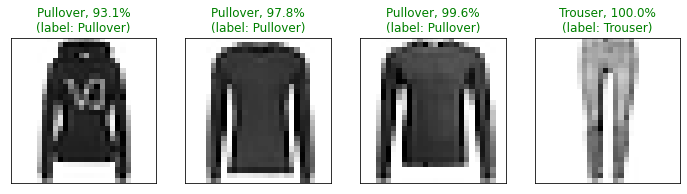

In [74]:
# Tracking model training with TensorBoard
for i,data in enumerate(trainloader,0):
  inputs,labels = data
  plot_classes_preds(net,inputs,labels)
  break
  



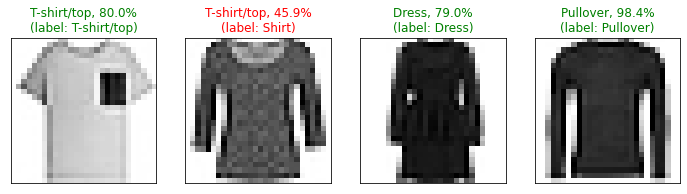

In [86]:
a = iter(trainloader)
inputs,labels = next(a)
fig = plot_classes_preds(net, inputs, labels)


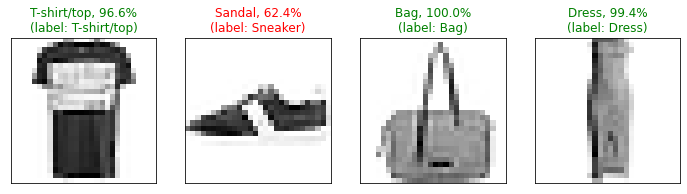

In [85]:
fig

In [81]:

writer.add_figure(tag='reslut_function', figure = fig)

In [98]:
LOG_DIR = '/content/sample_data/fashion_mnist_experiment_1'
get_ipython().system_raw('tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'.format(LOG_DIR))
#开启ngrok service，绑定port 6006(tensorboard)
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"
!tensorboard --logdir=/content/sample_data/fashion_mnist_experiment_1

https://90249084bd27.ngrok.io
2020-08-12 08:09:56.815666: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
W0812 08:09:58.841665 140572099426048 plugin_event_accumulator.py:323] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0812 08:09:58.842195 140572099426048 plugin_event_accumulator.py:362] Found more than one "run metadata" event with tag step1. Overwriting it with the newest event.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


## Assessing trained models with TensorBoard

In [97]:
# 1. gets the probability predictions in a test_size x num_classes Tensor
# 2. gets the preds in a test_size Tensor
# takes ~10 seconds to run

class_probs = []
class_preds = []
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    class_probs_batch = [F.softmax(el, dim=0) for el in outputs]
    _,class_preds_batch = torch.max(outputs, 1)
    
    class_probs.append(class_probs_batch)
    class_preds.append(class_preds_batch)

test_probs = torch.cat([torch.stack(x) for x in class_probs])
test_preds = torch.cat(class_preds)

#help function.
def add_pr_curve_tensorboard(class_index, test_probs, test_preds, global_step=0):
  tensorboard_preds = test_preds == class_index
  tensorboard_probs = test_probs[:,class_index]
  writer.add_pr_curve(classes[class_index],
            tensorboard_preds,
            tensorboard_probs,
            global_step = global_step
            )
  writer.close()


for i in range(len(classes)):
  add_pr_curve_tensorboard(i, test_probs, test_preds)



In [88]:
a = [[1,2,3],[1,2,3],[1,2,3]]
a

[[1, 2, 3], [1, 2, 3], [1, 2, 3]]

![链接文字](https://img-blog.csdnimg.cn/20200812161603175.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)